In [119]:
%load_ext autoreload

import os, sys
import networkx as nx

sys.path.insert(0, "../")

%autoreload 2
from mikg.kgraph import KGraph
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

import random
random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#kg = KGraph()

In [3]:
#kg.load_kgraph_base("../data/", go=True, omnipath=True, opentargets=True, reactome=True, STRING=True)

HMS:0:00:10.841079 626,136 annotations READ: ../data/goa_human.gaf 
../data/go-basic.obo: fmt(1.2) rel(2023-01-01) 46,739 Terms


/usr/local/hdd3/mikg/scripts/../mikg/load_utils.py:204: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  opd  = pd.read_csv(omnipathDB, sep="\t")
/usr/local/hdd3/mikg/scripts/../mikg/load_utils.py:387: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  ot_disease = pd.read_csv("../data/opentargets_disease_associations.tsv", sep="\t")
/usr/local/hdd3/mikg/scripts/../mikg/load_utils.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf["score"] = subdf[use_evidences].max(axis=1)/1000


PGM3 UAP1 {'fusion': 0, 'coexpression': 77, 'experiments': 272, 'database': 900, 'textmining': 720, 'score': 0.9}
PGM3 GNPNAT1 {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 700, 'score': 0.9}
PGM3 UAP1L1 {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 459, 'score': 0.9}
PGM3 GLO1 {'fusion': 0, 'coexpression': 96, 'experiments': 272, 'database': 0, 'textmining': 729, 'score': 0.729}
PGM3 PGM2 {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 0, 'textmining': 720, 'score': 0.72}
PGM3 NAGK {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 561, 'score': 0.9}
PGM3 ADI1 {'fusion': 708, 'coexpression': 42, 'experiments': 0, 'database': 0, 'textmining': 0, 'score': 0.708}
PGM3 PGM5 {'fusion': 0, 'coexpression': 0, 'experiments': 272, 'database': 0, 'textmining': 720, 'score': 0.72}
PGM3 PGM1 {'fusion': 0, 'coexpression': 0, 'experiments': 272, 'database': 0, 'textmining': 719, 'sc

In [4]:
#kg.print_kg_info()

In [5]:
#print(kg.kg)

In [6]:
#kg.save_kgraph("../data/initial_base_graph.out")

In [7]:
kg = KGraph()
kg.load_kgraph("../data/initial_base_graph.out")

In [73]:
exprDF = pd.read_csv("../seq_data/expression_mean_df.tsv", sep="\t")
cmDF = exprDF[exprDF.group == "Cardiomyocyte"]
cmDF

,group,gene,min,percentile_25,median,percentile_75,max,mean,anum,num,sd
22891,Cardiomyocyte,A1BG,0.218642,0.439190,0.607427,0.831411,2.456248,0.709995,351,351,0.395967
22892,Cardiomyocyte,A1BG-AS1,0.214143,0.456117,0.643483,0.936906,3.038826,0.806031,461,461,0.518502
22893,Cardiomyocyte,A1CF,0.208636,0.422485,0.557386,0.773439,3.025672,0.637636,706,706,0.321588
22894,Cardiomyocyte,A2M,0.181245,0.651118,0.944811,1.398837,3.792171,1.075190,32973,32973,0.547520
22895,Cardiomyocyte,A2M-AS1,0.185317,0.412732,0.539294,0.709554,2.699968,0.602207,3160,3160,0.286947
...,...,...,...,...,...,...,...,...,...,...,...
50958,Cardiomyocyte,ZXDC,0.185317,0.610198,0.829333,1.097115,3.521134,0.891553,35191,35191,0.378761
50959,Cardiomyocyte,ZYG11A,0.224826,0.414667,0.540848,0.712375,2.653949,0.637458,303,303,0.367307
50960,Cardiomyocyte,ZYG11B,0.187795,0.600248,0.812252,1.080384,3.494183,0.880513,33025,33025,0.386580
50961,Cardiomyocyte,ZYX,0.193169,0.445595,0.595571,0.835346,3.001737,0.705213,5338,5338,0.395080


In [9]:
fibDF = exprDF[exprDF.group == "Fibroblast"]
fibDF

,group,gene,min,percentile_25,median,percentile_75,max,mean,anum,num,sd
102873,Fibroblast,A1BG,0.501998,1.235752,1.491982,1.768195,3.631375,1.531841,424,424,0.470582
102874,Fibroblast,A1BG-AS1,0.364096,1.273964,1.557159,1.973099,3.494957,1.646681,740,740,0.546756
102875,Fibroblast,A1CF,0.936434,1.459199,1.669136,1.904395,2.955688,1.831157,26,26,0.580027
102876,Fibroblast,A2M,0.247064,1.381439,1.648303,1.966196,3.730105,1.697126,7728,7728,0.459571
102877,Fibroblast,A2M-AS1,0.505575,1.179612,1.453647,1.743054,2.720268,1.469821,283,283,0.438858
...,...,...,...,...,...,...,...,...,...,...,...
130942,Fibroblast,ZXDC,0.387950,1.322788,1.577880,1.881845,3.752063,1.619841,8704,8704,0.436627
130943,Fibroblast,ZYG11A,0.500970,1.192219,1.493319,1.868409,3.407745,1.553399,243,243,0.492998
130944,Fibroblast,ZYG11B,0.361290,1.331387,1.584627,1.906673,3.565702,1.633891,8709,8709,0.446266
130945,Fibroblast,ZYX,0.364096,1.292344,1.547185,1.865861,3.436410,1.594237,3505,3505,0.446001


In [75]:
exprDFs = {}

for group in exprDF.group.unique():
    exprDFs[group] = exprDF[exprDF.group == group].copy()

print([x for x in exprDFs])

['Adipocyte', 'Cardiomyocyte', 'Cycling cells', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'vSMCs']


In [10]:
kg.add_gene_expression(cmDF)

28072
Found Genes 22753


In [11]:
kg.get_node_data("CCL2")

{'type': 'gene',
 'score': 0,
 'expression': {'mean': 0.7961505602787607,
  'perc_expr': 1.0,
  'median': 0.6903093253438801}}

In [12]:
kg.get_node_data("EFO:0004775")

{'type': 'disease',
 'name': 'toxic epidermal necrolysis',
 'source': 'opentargets'}

In [13]:
kg.get_node_types()

Counter({'gene': 51578, 'geneset': 49332, 'disease': 12701, 'drug': 3212})

In [14]:
kg.get_edge_types()

Counter({'activates': 113800,
         'relevant_in': 203769,
         'interacts': 2856008,
         'part_of': 200831,
         'represses': 8381,
         'affects': 35862,
         'targeted_by': 8268})

In [15]:
kg.get_edge_between_type()

Counter({('gene', 'geneset'): 412777,
         ('gene', 'gene'): 362249,
         ('geneset', 'geneset'): 74934,
         ('geneset', 'gene'): 4072,
         ('disease', 'gene'): 2528757,
         ('drug', 'disease'): 35826,
         ('drug', 'gene'): 8268,
         ('drug', 'geneset'): 36})

In [131]:
def scoring_represses(x, y):
    return x - y

def scoring_activates(x, y):
    return x*y

def scoring_interacts(x,y):
    return x*y

def scoring_null(x,y):
    return 0

scoring_gene_gene_expression = {"represses": scoring_represses, "activates": scoring_activates, "interacts": scoring_interacts, "-": scoring_null}

def gene_geneset(kg, node, edges):
    
    allExpr = list()
    for edge in edges:
        
        otherEnd = edge[0] if node==edge[1] else edge[1]
        otherExpr = kg.nodes[otherEnd].get("expression", {}).get("mean", 0)
        
        allExpr.append(otherExpr)
    
    return np.mean(allExpr)
        
        

def geneset_geneset(kg, node, edges):
    
    allExpr = list()
    for edge in edges:
        
        otherEnd = edge[0] if node==edge[1] else edge[1]
        otherExpr = kg.nodes[otherEnd].get("score", 0)
        
        allExpr.append(otherExpr)
    
    return np.mean(allExpr)


def scoring_represses(x, y):
    return x - y

def scoring_activates(x, y):
    return x*y

def scoring_interacts(x,y):
    return x*y

def scoring_null(x,y):
    return 0

scoring_interactions = {"relevant_in": scoring_interacts,
                        "activates": scoring_activates,
                        "part_of": scoring_interacts,
                        "represses": scoring_represses,
                        "interacts": scoring_interacts,
                        "targeted_by": scoring_interacts,
                        "affects": scoring_interacts,
                        "-": scoring_null
                        }

def get_score(x):
    if x.get("type", "-") == "gene":
        return x.get("expression", {}).get("mean", 0)
    else:
        return x.get("score", 0)

In [17]:
kg.score_gene_gene_edges(scoring_gene_gene_expression)

kg.score_nodes(ntype="geneset", consider_edge_type=[("gene", "geneset")], scoring_function=gene_geneset)
kg.score_nodes(ntype="disease", consider_edge_type=[("disease", "gene")], scoring_function=gene_geneset)
kg.score_nodes(ntype="drug", consider_edge_type=[("drug", "gene")], scoring_function=gene_geneset)

kg.score_nodes(ntype="geneset", consider_edge_type=[("geneset", "geneset")], scoring_function=geneset_geneset)
kg.score_nodes(ntype="drug", consider_edge_type=[("drug", "disease")], scoring_function=geneset_geneset)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


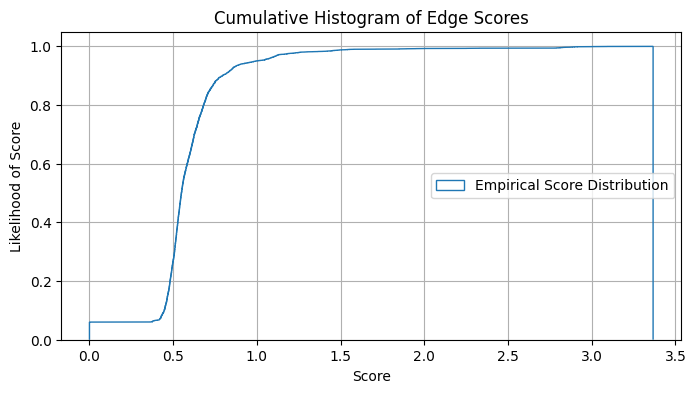

In [132]:
kg.plot_score_histogram(edge_types=[("drug", "gene")])

In [140]:
exprKGs = {}

for group in exprDFs:
    
    print(group)
    
    gKG = KGraph()
    
    gKG.load_kgraph("../data/initial_base_graph.out")

    gKG.add_gene_expression(exprDFs[group])

    gKG.score_gene_gene_edges(scoring_gene_gene_expression)

    gKG.score_nodes(ntype="geneset", consider_edge_type=[("gene", "geneset")], scoring_function=gene_geneset)
    gKG.score_nodes(ntype="disease", consider_edge_type=[("disease", "gene")], scoring_function=gene_geneset)
    gKG.score_nodes(ntype="drug", consider_edge_type=[("drug", "gene")], scoring_function=gene_geneset)

    gKG.score_nodes(ntype="geneset", consider_edge_type=[("geneset", "geneset")], scoring_function=geneset_geneset)
    gKG.score_nodes(ntype="drug", consider_edge_type=[("drug", "disease")], scoring_function=geneset_geneset)
    
    gKG.score_edges(get_score, "type", scoring_interactions, in_types=None, out_types=None, ignore_edge_types=[("gene", "gene")])
        
    exprKGs[group] = gKG

Adipocyte
22891
Found Genes 19560
Cardiomyocyte
28072
Found Genes 22753
Cycling cells
24070
Found Genes 20461
Endothelial
27840
Found Genes 22680
Fibroblast
28074
Found Genes 22822
Lymphoid
25525
Found Genes 21392
Mast
20817
Found Genes 18299
Myeloid
27246
Found Genes 22374
Neuronal
24790
Found Genes 20837
Pericyte
26333
Found Genes 21782
vSMCs
24144
Found Genes 20401


In [141]:
import pickle

with open("exprkgs.pickle", 'wb') as f:
    pickle.dump(exprKGs, f)

In [19]:
for edge in kg.get_node_edges("CCL2", in_types=["gene"], out_types=["gene"]):
    
    inExpr = kg.get_node_data(edge[0]).get("expression", {}).get("mean", 0)
    outExpr = kg.get_node_data(edge[1]).get("expression", {}).get("mean", 0)
    edgeType = kg.kg.edges[edge].get("type", "-")
    
    print(edge, edgeType, kg.kg.edges[edge]["score"])

('NFE2L2', 'CCL2') represses 0.0951349990717979
('CCL13', 'CCL2') interacts 0.6625857304149431
('JUN', 'CCL2') interacts 0.678076627194631
('FOSL1', 'CCL2') activates 0.6385272061656778
('LIF', 'CCL2') interacts 0.9927254232835401
('TNF', 'CCL2') interacts 0.7117152499574244
('TNFSF11', 'CCL2') activates 0.4971813210978469
('CSF2', 'CCL2') interacts 0.0
('CSF1', 'CCL2') interacts 0.5629802912872744
('JAK2', 'CCL2') activates 0.7929084270651282
('OLR1', 'CCL2') activates 0.6767790033398968
('FOS', 'CCL2') interacts 0.7147633967622257
('HMOX1', 'CCL2') represses 0.3253752315000341
('CDK9', 'CCL2') activates 0.5590232420261081
('IL18', 'CCL2') interacts 0.5347951866341579
('IL32', 'CCL2') activates 0.6302132415731214
('ESR2', 'CCL2') represses -0.020434977340974325
('OSM', 'CCL2') activates 0.6184311733146713
('IL6', 'CCL2') interacts 0.8415316531974776
('SAA1', 'CCL2') activates 0.6509382189399009
('FPR1', 'CCL2') activates 0.6219689539789496
('FADD', 'CCL2') activates 0.4808629802787559

In [21]:
for edge in kg.get_node_edges("CCL2"):

    edgeType = kg.kg.edges[edge].get("type", "-")
    
    print(edge, edgeType, kg.kg.edges[edge]["score"])

('NFE2L2', 'CCL2') represses 0.0951349990717979
('CCL13', 'CCL2') interacts 0.6625857304149431
('JUN', 'CCL2') interacts 0.678076627194631
('FOSL1', 'CCL2') activates 0.6385272061656778
('LIF', 'CCL2') interacts 0.9927254232835401
('TNF', 'CCL2') interacts 0.7117152499574244
('TNFSF11', 'CCL2') activates 0.4971813210978469
('CSF2', 'CCL2') interacts 0.0
('CSF1', 'CCL2') interacts 0.5629802912872744
('JAK2', 'CCL2') activates 0.7929084270651282
('OLR1', 'CCL2') activates 0.6767790033398968
('FOS', 'CCL2') interacts 0.7147633967622257
('HMOX1', 'CCL2') represses 0.3253752315000341
('CDK9', 'CCL2') activates 0.5590232420261081
('IL18', 'CCL2') interacts 0.5347951866341579
('IL32', 'CCL2') activates 0.6302132415731214
('ESR2', 'CCL2') represses -0.020434977340974325
('OSM', 'CCL2') activates 0.6184311733146713
('IL6', 'CCL2') interacts 0.8415316531974776
('SAA1', 'CCL2') activates 0.6509382189399009
('FPR1', 'CCL2') activates 0.6219689539789496
('FADD', 'CCL2') activates 0.4808629802787559

In [22]:
kg.kg.nodes["GO:0007568"]

{'id': 'GO:0007568',
 'name': 'aging',
 'type': 'geneset',
 'ns': 'biological_process',
 'score': 0.5745062010148578,
 'source': 'GeneOntology'}

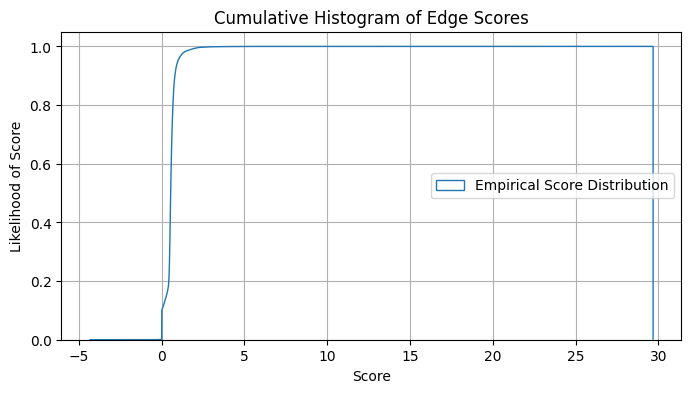

In [23]:
kg.plot_score_histogram()

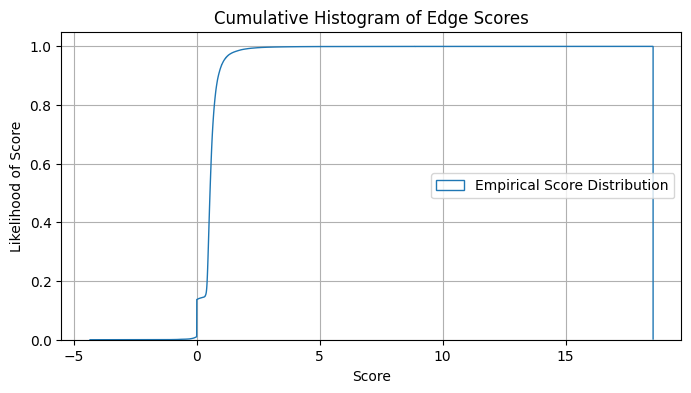

In [24]:
kg.plot_score_histogram(edge_types=[("gene", "gene")])

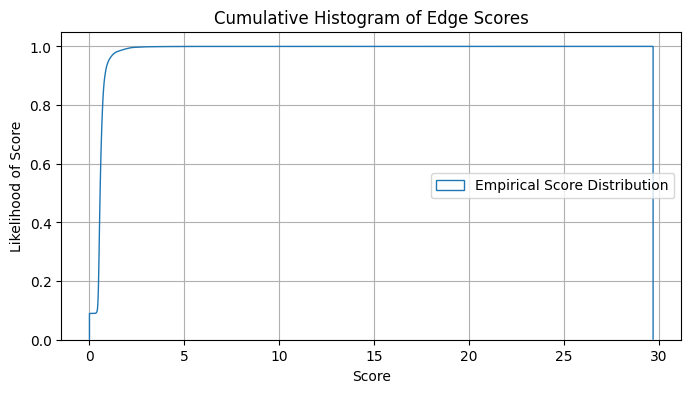

In [25]:
kg.plot_score_histogram(edge_types=[("disease", "gene")])

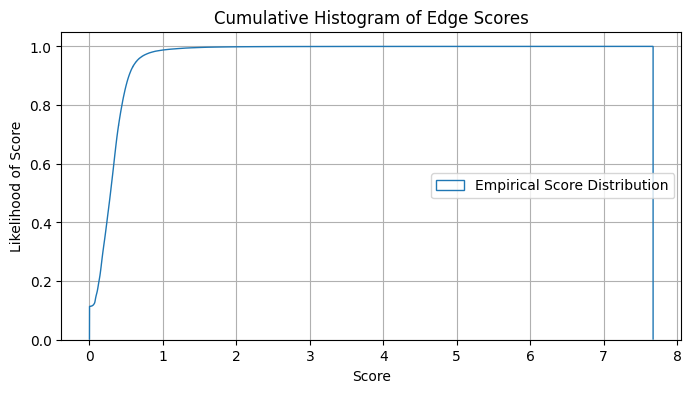

In [26]:
kg.plot_score_histogram(edge_types=[("gene", "geneset")])

['gene -> geneset', 'gene -> gene', 'geneset -> geneset', 'geneset -> gene', 'disease -> gene', 'drug -> disease', 'drug -> gene', 'drug -> geneset']
             class  value
0  gene -> geneset    0.0
1  gene -> geneset    0.0
2  gene -> geneset    0.0
3  gene -> geneset    0.0
4  gene -> geneset    0.0


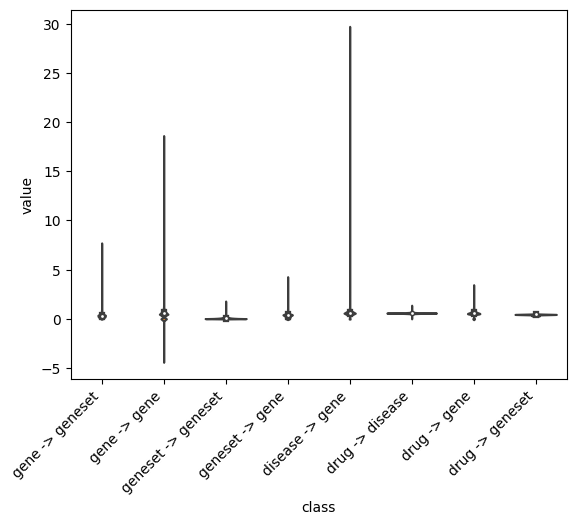

In [27]:
kg.plot_score_violin(per_edge_type=True)

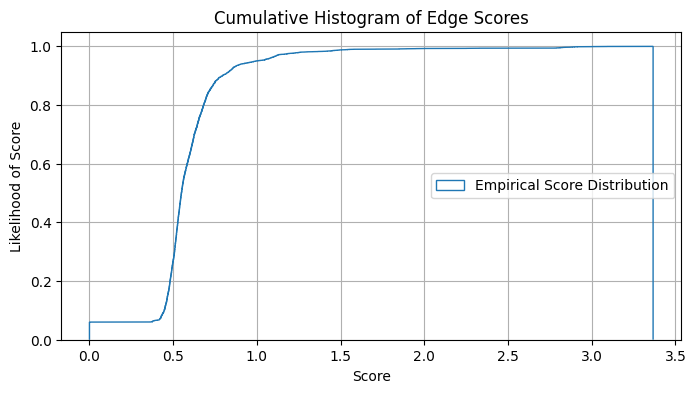

In [28]:
kg.plot_score_histogram(edge_types=[("drug", "gene")])

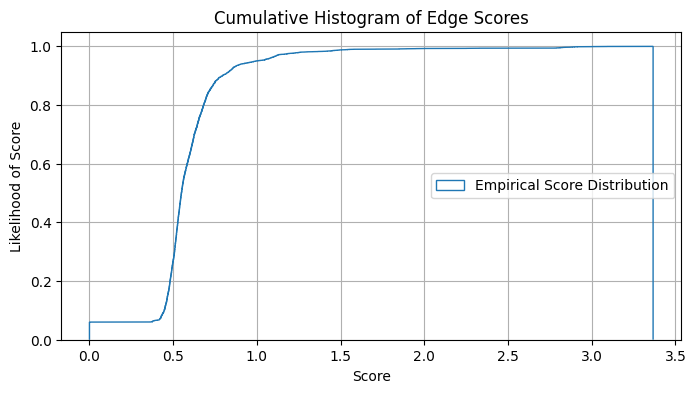

In [152]:
exprKGs["Cardiomyocyte"].plot_score_histogram(edge_types=[("drug", "gene")])

In [157]:
import community

In [159]:
initialGroup = "vSMCs"

sub_kg = exprKGs[initialGroup].kg.edge_subgraph([x for x in exprKGs[initialGroup].kg.edges if exprKGs[initialGroup].kg.edges[x].get("score", 0) > 3.0]).copy()
sub_kg_ud = sub_kg.to_undirected()
print(sub_kg)

partition = community.best_partition(sub_kg_ud, resolution=5, random_state=42)

rev_partition = defaultdict(set)
for x in partition:
    rev_partition[partition[x]].add(x)
    
for x in rev_partition:
    if len(rev_partition[x]) > 10:
        print(x, len(rev_partition[x]), "PDK4" in rev_partition[x])
        
for cID in rev_partition:
    
    if len(rev_partition[cID]) < 10:
        continue
    
    commScores = kg.score_subgraphs_for_subnet(exprKGs, rev_partition[cID])
    
    diffScores = {}
    for x in commScores:
        diffScores[x] = np.median(commScores[x]) / np.median(commScores[initialGroup])
        
    print("community", cID, len(rev_partition[cID]))
    for x in diffScores:
        print(x, diffScores[x])
    print()

DiGraph with 14986 nodes and 134796 edges
0 134 False
1 114 False
2 438 False
61 145 False
4 52 False
5 51 False
6 41 False
7 178 False
8 82 False
9 89 False
10 50 False
11 114 False
12 76 False
13 215 False
14 89 False
15 57 False
16 67 False
17 68 False
18 27 False
19 198 False
20 90 True
21 71 False
22 165 False
23 40 False
24 54 False
25 55 False
26 67 False
27 160 False
28 33 False
29 169 False
30 73 False
31 157 False
32 58 False
33 80 False
34 285 False
35 156 False
36 145 False
37 467 False
38 89 False
39 68 False
40 45 False
41 103 False
42 105 False
43 48 False
44 68 False
45 68 False
46 20 False
47 161 False
48 126 False
49 46 False
50 26 False
51 109 False
52 52 False
53 103 False
54 103 False
55 206 False
56 39 False
57 141 False
58 112 False
59 263 False
60 77 False
62 43 False
63 83 False
64 198 False
65 291 False
66 69 False
67 126 False
68 58 False
69 37 False
70 128 False
71 232 False
72 279 False
73 99 False
74 96 False
75 148 False
76 32 False
77 62 False
78 32 Fals

In [45]:
def plot_graph(G, close=True, pos=None):   

    #pos = nx.kamada_kawai_layout(G, pos=nx.spring_layout(G, k=0.15, iterations=20))  # For better example looking
    if pos is None:
        pos = nx.spring_layout(G, k=0.15, iterations=10)
    nx.draw_networkx_nodes(G, pos, node_size=100)
    posnodes = {}
    for x in pos:
        posnodes[x] = list(pos[x])
        posnodes[x][1] += 0.02
        
    nodelabels = {}
    for x in G.nodes:
        
        if "name" in G.nodes[x]:
            nodelabels[x] = "{}\n({})".format(G.nodes[x].get("name", x), x)
        else:
            nodelabels[x] = x
        
    nx.draw_networkx_labels(G, posnodes, labels=nodelabels)
    nx.draw_networkx_edges(G, pos, width=2, edge_cmap = plt.cm.Reds, edge_color=[G.edges[e].get("score", 0) for e in G.edges])
    if close:
        plt.show()
        plt.close()
        
    return pos

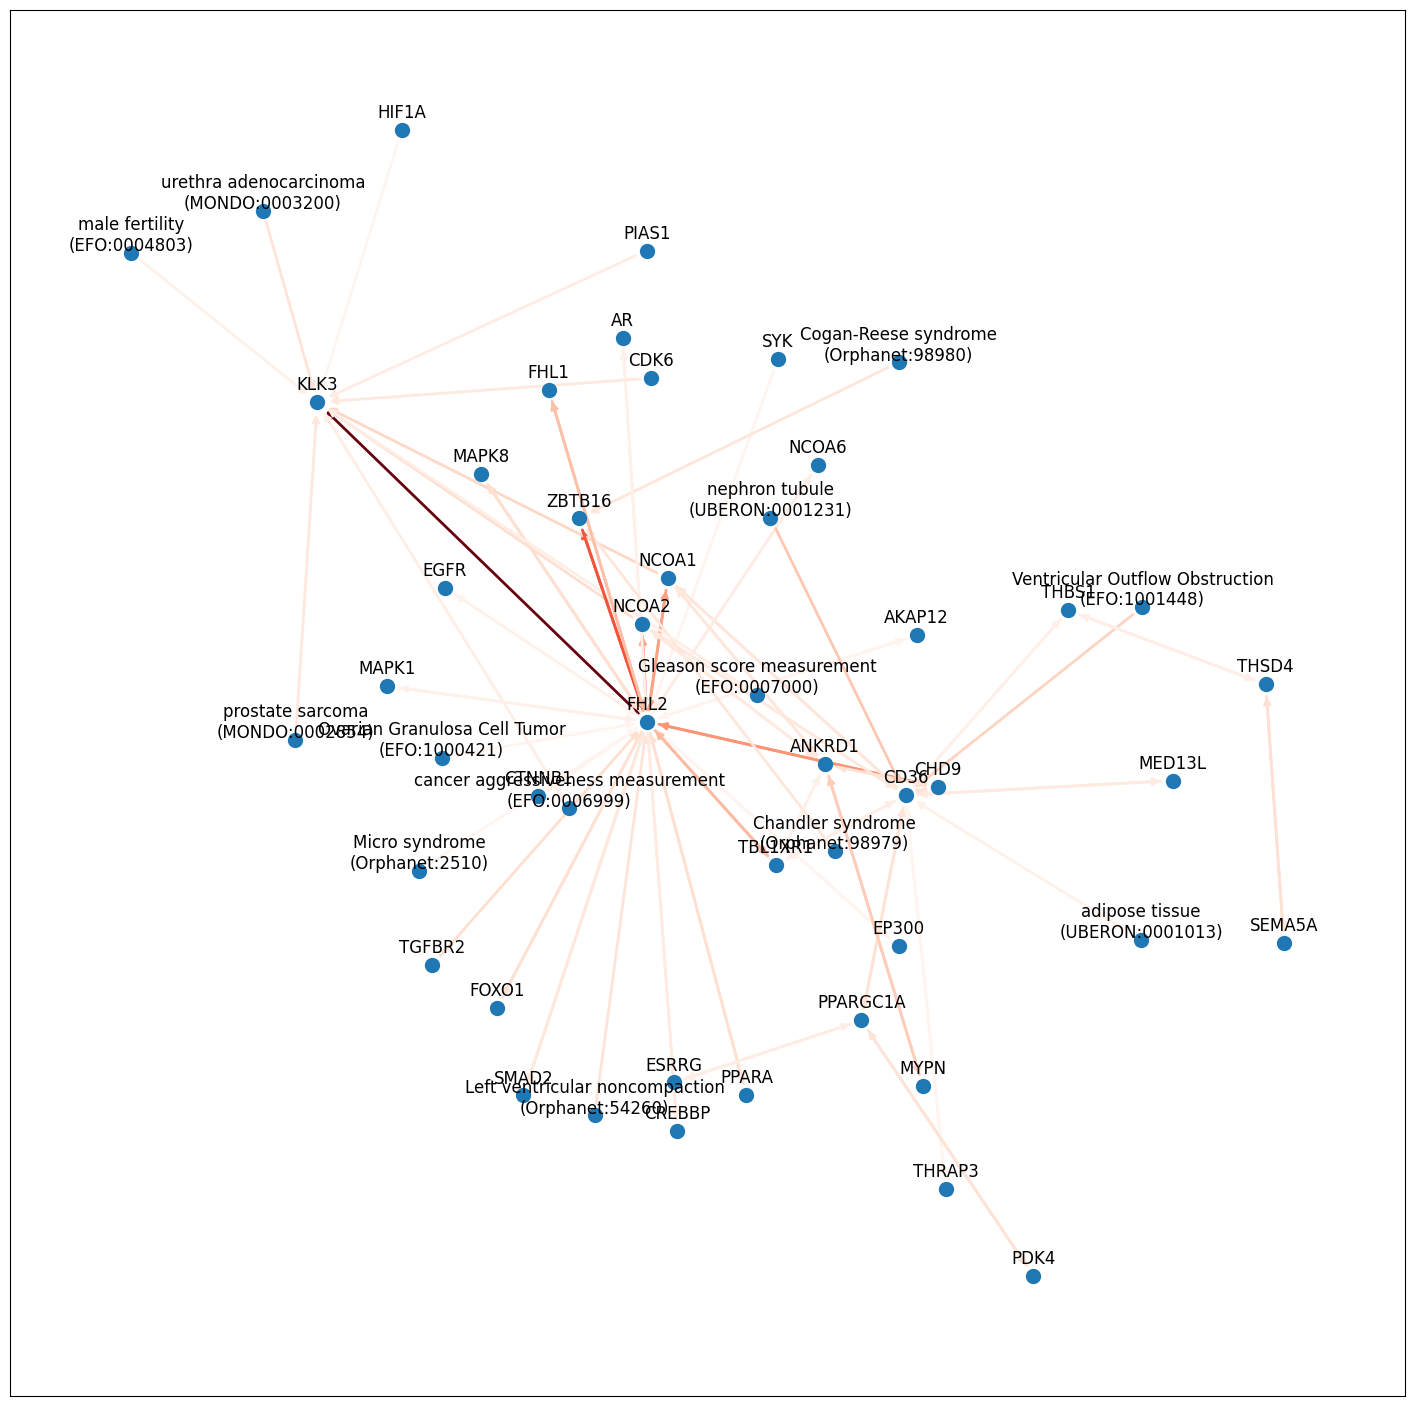

In [147]:
matplotlib.rcParams['figure.figsize'] = [18, 18]

pos=plot_graph(sub_kg.subgraph(rev_partition[4]))

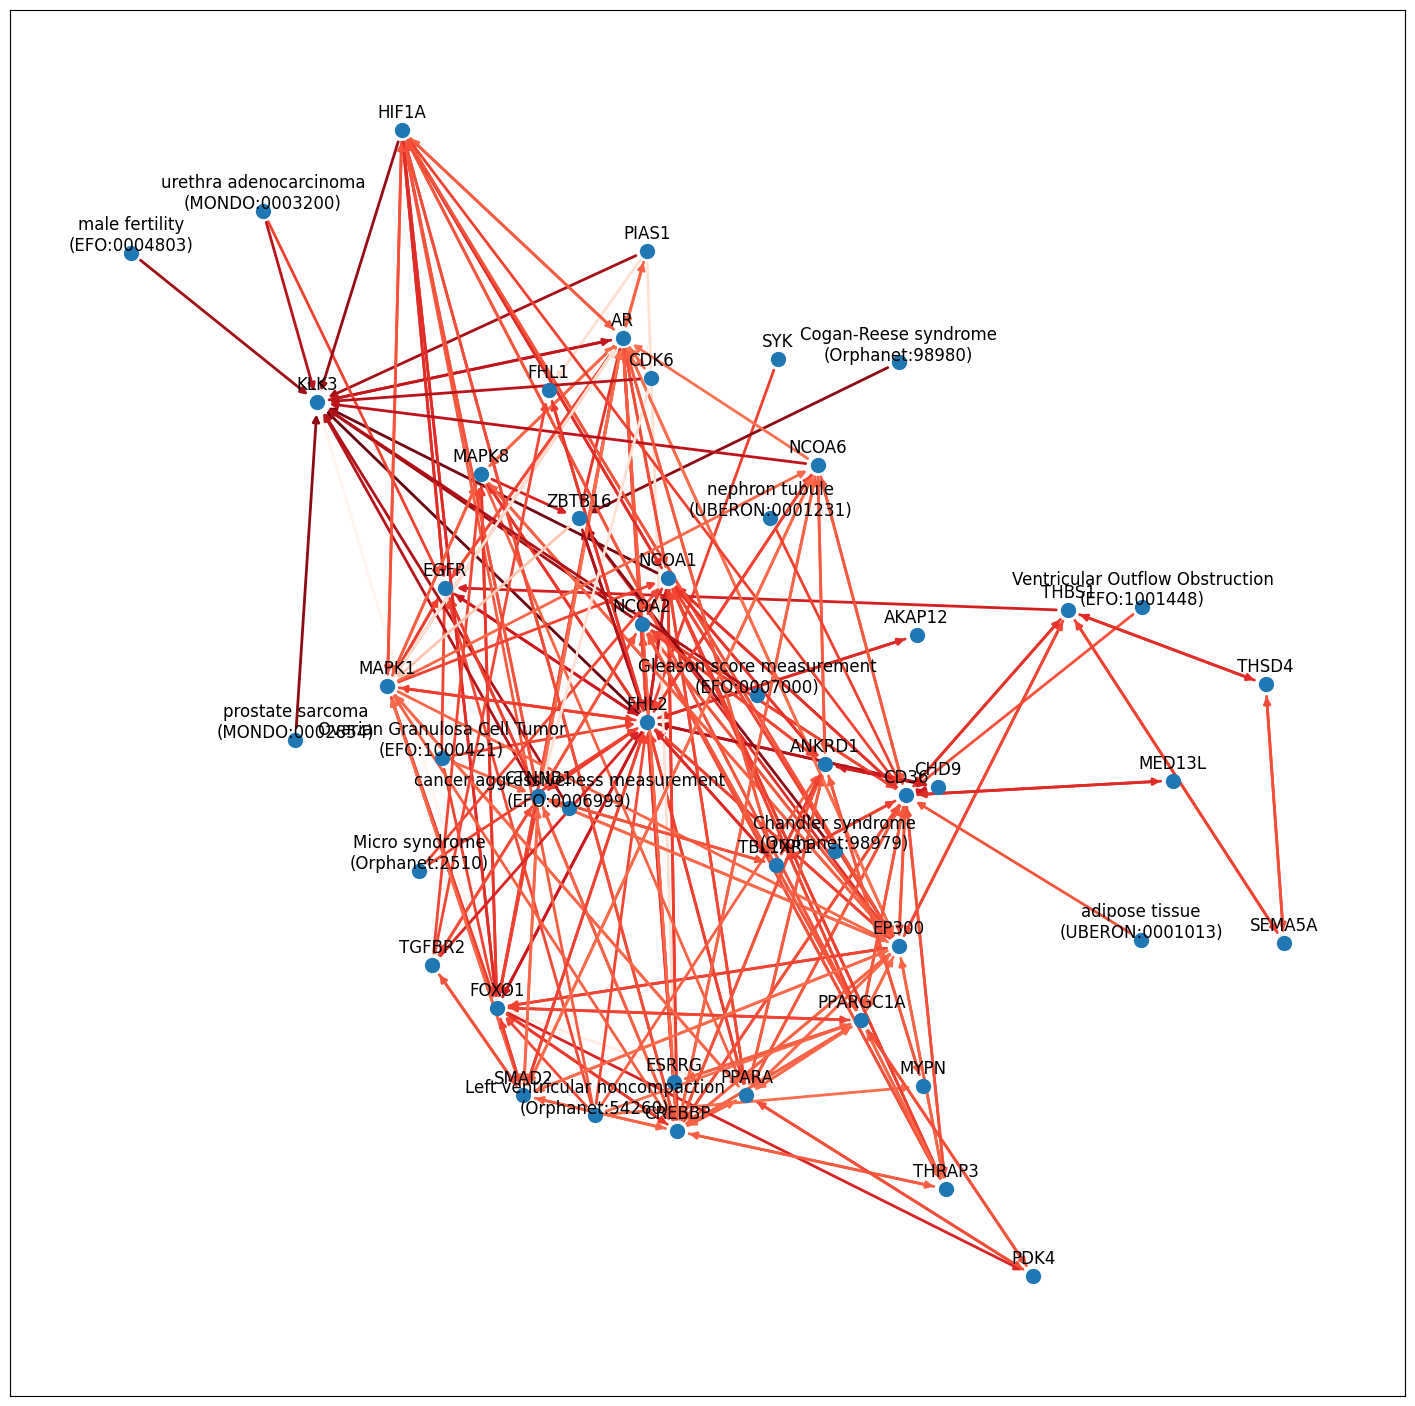

In [148]:
matplotlib.rcParams['figure.figsize'] = [18, 18]

_=plot_graph(exprKGs["Fibroblast"].kg.subgraph(rev_partition[4]), pos=pos)

In [ ]:
#exprKGs = pickle.load(open("exprkgs.pickle", "rb"))

0 540
1 274
2 40
3 49
4 143
5 70
6 108
7 128
8 236
9 160
11 37
12 181
37 61
16 38
18 30
19 33
14 25
22 23

Adipocyte 2.1960135111136427
Cardiomyocyte 2.129097213373679
Cycling cells 3.778100728505963
Endothelial 4.067986657655871
Fibroblast 3.574923090664141
Lymphoid 4.507501298728354
Mast 3.5459311267574427
Myeloid 3.840915678046361
Neuronal 3.8192990996700034
Pericyte 3.9803818890177145
vSMCs 3.2544325514299666


/usr/local/hdd3/mikg/scripts/../mikg/kgraph.py:383: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


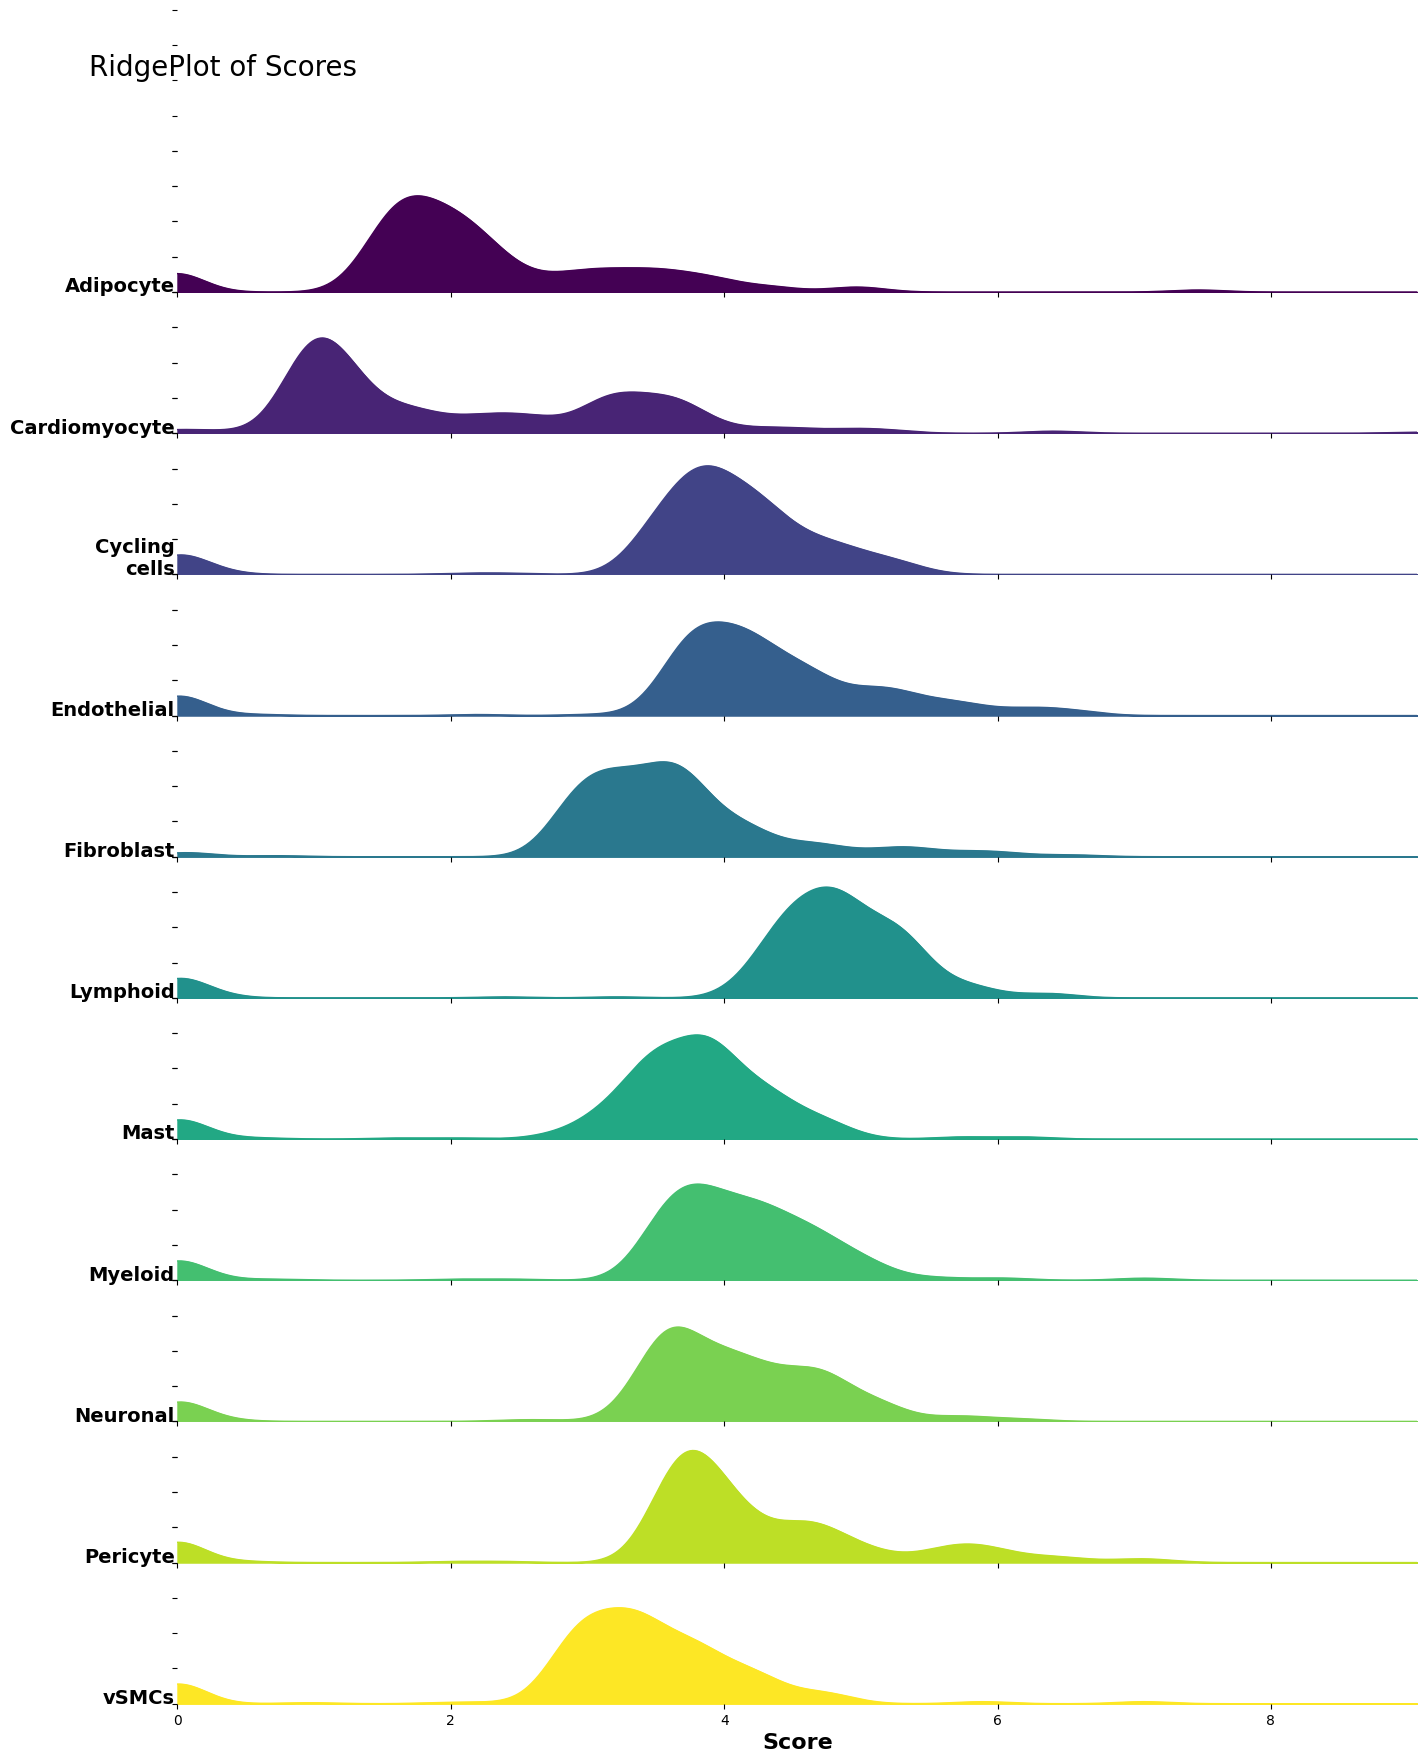

In [151]:
kgScores =kg.score_subgraphs_for_subnet(exprKGs, rev_partition[4])
kg.plot_subgraph_scores(kgScores)